In [80]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [81]:
df = pd.read_csv('creditcard.csv')
cols = df.columns
features = cols.delete(len(cols)-1)
features = df[features]
labels = df['Class']
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [82]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


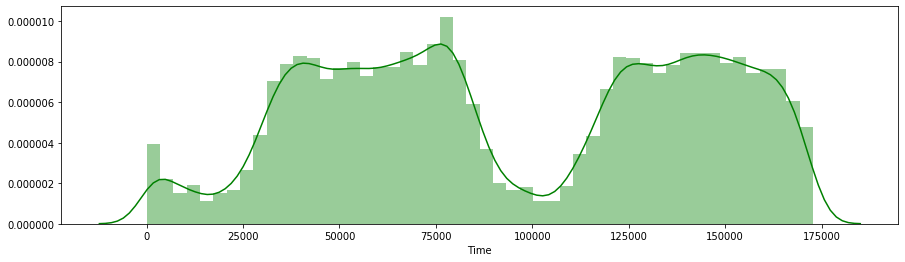

In [83]:
# Distribution of the Time Variable

plt.figure(figsize=(15,4))
fig = sns.distplot(df['Time'], kde=True, color="green")
plt.show()

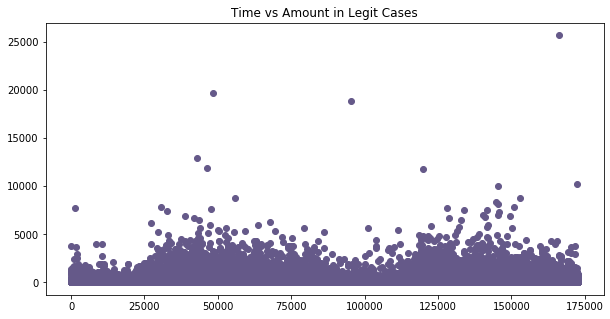

In [84]:
# Time vs Amount in Legit Cases

plt.figure(figsize=(10,5))
fig = plt.scatter(x=df[df['Class'] == 0]['Time'], y=df[df['Class'] == 0]['Amount'], color="#655989")
plt.title("Time vs Amount in Legit Cases")
plt.show()

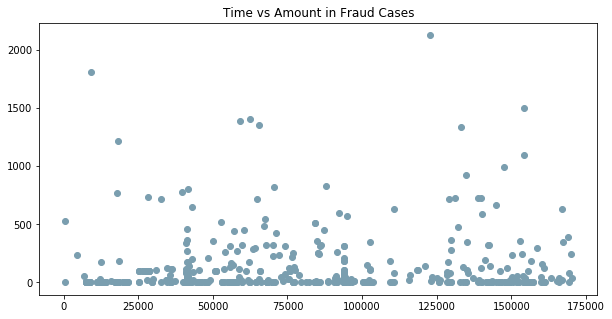

In [85]:
# Time vs Amount in Fraud Cases

plt.figure(figsize=(10,5))
fig = plt.scatter(x=df[df['Class'] == 1]['Time'], y=df[df['Class'] == 1]['Amount'], color="#7a9eaf")
plt.title("Time vs Amount in Fraud Cases")
plt.show()

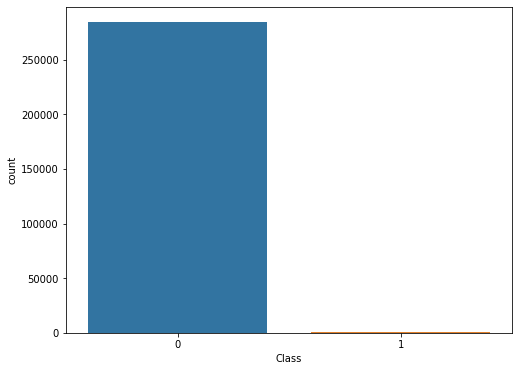

In [86]:
# Class 0 (inliers) and Class 1 (Outliers)

plt.figure(figsize=(8,6))
fig = sns.countplot(x="Class", data=df)
plt.show()

In [87]:
# Build train and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features,labels,test_size=0.2,random_state=0)

In [88]:
# Create from train set a new data set to obtain a balanced data set using SMOTE
oversampler = SMOTE(random_state=0)
os_features,os_labels = oversampler.fit_sample(features_train,labels_train)

In [89]:
# Perform training of the random forest using the (over sampled) train set
clf = RandomForestClassifier(random_state=0)
clf.fit(os_features,os_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [90]:
# perform predictions on test set
actual = labels_test
predictions = clf.predict(features_test)
# Confusion Matrix
confusion_matrix(actual,predictions)

array([[56846,    15],
       [   17,    84]], dtype=int64)

In [91]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)
print("Precision score for random forest",precision_score(actual, predictions, average='weighted'))
print("Recall score    ",recall_score(actual, predictions, average='weighted'))
print("F1 score        ",f1_score(actual, predictions, average='weighted'))

0.9157096835587077
Precision score for random forest 0.999432912601828
Recall score     0.9994382219725431
F1 score         0.9994354180222427


In [92]:
#using decision tree
from sklearn import tree
clf2 = tree.DecisionTreeClassifier()
clf2.fit(os_features,os_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [93]:
#decision tree
predictions2 = clf2.predict(features_test)
#decision tree
confusion_matrix(actual,predictions2)

array([[56778,    83],
       [   23,    78]], dtype=int64)

In [94]:
#decision tree
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions2)
roc_auc2 = auc(false_positive_rate, true_positive_rate)
print (roc_auc2)
print("Precision score for decision tree",precision_score(actual, predictions2, average='weighted'))
print("Recall score    ",recall_score(actual, predictions2, average='weighted'))
print("F1 score        ",f1_score(actual, predictions2, average='weighted'))

0.8854087638763349
Precision score for decision tree 0.9986817067812177
Recall score     0.998139110284049
F1 score         0.9983516980950795


In [95]:
#Using KNN
from sklearn.neighbors import KNeighborsClassifier
clf3 = KNeighborsClassifier(n_neighbors=3)
clf3.fit(os_features,os_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [96]:
predictions3 = clf3.predict(features_test)
#KNN
confusion_matrix(actual,predictions3)

array([[54273,  2588],
       [   47,    54]], dtype=int64)

In [97]:
#KNN
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions3)
roc_auc3 = auc(false_positive_rate, true_positive_rate)
print (roc_auc3)
print("Precision score for KNN",precision_score(actual, predictions3, average='weighted'))
print("Recall score    ",recall_score(actual, predictions3, average='weighted'))
print("F1 score        ",f1_score(actual, predictions3, average='weighted'))

0.7445694825369701
Precision score for KNN 0.9973994200119168
Recall score     0.9537410905515958
F1 score         0.9746386310203391
